## Predicción precios casas Londres 

Con el DataSet que vamos a cargar vamos a tratar de predecir el precio de una vivienda en Londres según una serie de características aplicando un modelo Random Forest Regressor.

#### Importación librerias

In [628]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics

#### Carga de datos

In [630]:
data = pd.read_csv("C:/Users/pauri/OneDrive/Escritorio/PYTHON PROJECTS/PROYECTOS/Precios casas Londres/london_houses.csv")
data.head(5)

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


In [631]:
data.columns = data.columns.str.replace(' ', '_')

#### Descripción y visualización de los datos

In [633]:
data.shape

(1000, 17)

Tenemos 1000 pisos com 17 variables cada uno. Dropeamos la dirección del inmueble, pues ya disponemos del barrio.

In [635]:
# Eliminamos variable Address, pues es indiferente ya que disponemos del barrio
data.drop(["Address"],inplace=True,axis=1)
data.head()

,Neighborhood,Bedrooms,Bathrooms,Square_Meters,Building_Age,Garden,Garage,Floors,Property_Type,Heating_Type,Balcony,Interior_Style,View,Materials,Building_Status,Price_(£)
0,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


In [636]:
# Existencia de valores NA
data.isnull().sum()

Neighborhood       0
Bedrooms           0
Bathrooms          0
Square_Meters      0
Building_Age       0
Garden             0
Garage             0
Floors             0
Property_Type      0
Heating_Type       0
Balcony            0
Interior_Style     0
View               0
Materials          0
Building_Status    0
Price_(£)          0
dtype: int64

In [637]:
# Datos descriptivos de las variables numéricas
data.describe()

,Bedrooms,Bathrooms,Square_Meters,Building_Age,Floors,Price_(£)
count,1000.000000,1000.000000,1000.0000,1000.00000,1000.000000,1.000000e+03
mean,3.013000,2.003000,149.6270,49.96500,1.991000,1.840807e+06
std,1.393834,0.808483,58.0562,29.07086,0.821946,8.793484e+05
min,1.000000,1.000000,50.0000,1.00000,1.000000,3.866660e+05
25%,2.000000,1.000000,99.0000,24.00000,1.000000,1.161400e+06
50%,3.000000,2.000000,148.0000,50.00000,2.000000,1.721999e+06
75%,4.000000,3.000000,201.0000,76.00000,3.000000,2.390500e+06
max,5.000000,3.000000,249.0000,99.00000,3.000000,4.980000e+06


In [638]:
# Nombre de las variables
data.columns

Index(['Neighborhood', 'Bedrooms', 'Bathrooms', 'Square_Meters',
       'Building_Age', 'Garden', 'Garage', 'Floors', 'Property_Type',
       'Heating_Type', 'Balcony', 'Interior_Style', 'View', 'Materials',
       'Building_Status', 'Price_(£)'],
      dtype='object')

In [639]:
# Segmentación variables numéricas y categoricas
numericas = data[["Bedrooms","Bathrooms","Square_Meters","Building_Age","Floors","Price_(£)"]]
categoricas = data[["Neighborhood","Garden","Garage","Property_Type","Heating_Type","Balcony","Interior_Style","View","Materials","Building_Status"]]

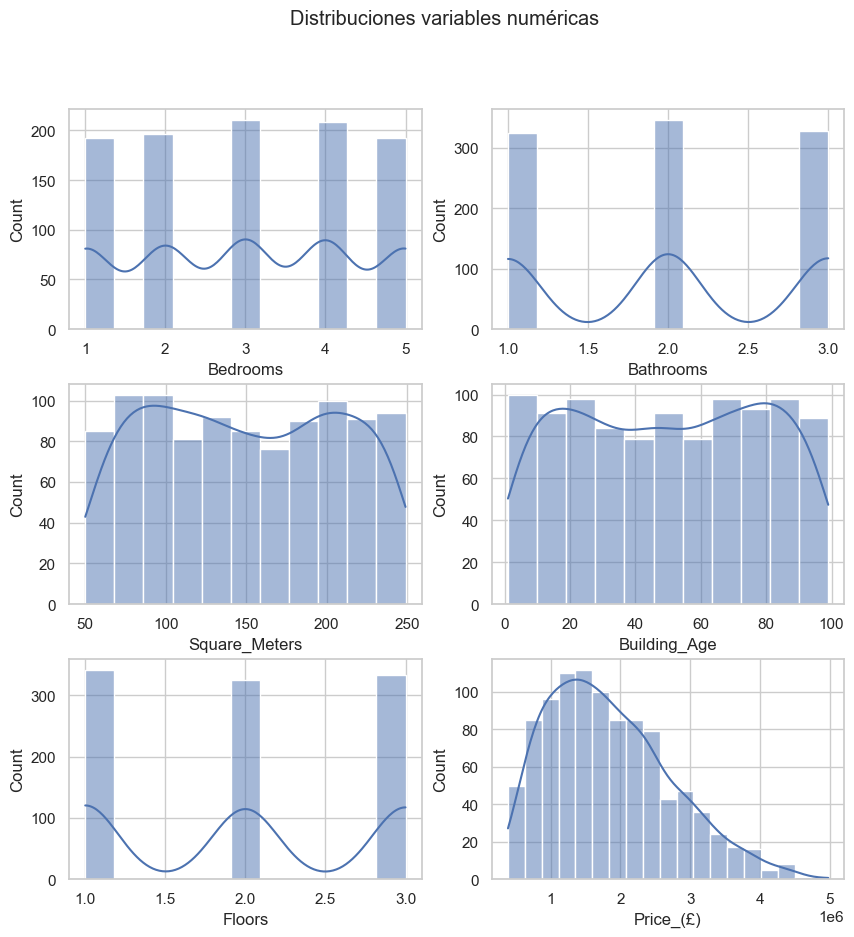

In [640]:
# Representación distribuciones variables numéricas
num_columns = 2
num_rows = 3
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(num_rows,num_columns,figsize = (10,10))
axes = axes.flatten()

for i, column in enumerate(numericas.columns):
    sns.histplot(numericas[column],ax=axes[i],kde=True)
    
fig.suptitle("Distribuciones variables numéricas")
plt.subplots_adjust(hspace=0.25)
plt.show()


Observamos que todas las variables mantienen unos números similares por opcíon menos el precio que, como es lógico, tiene carácter descendente.

Vamos a representar las variables numéricas square meters y bedrooms, que consideramos que son las más importantes, en función de la variable price 

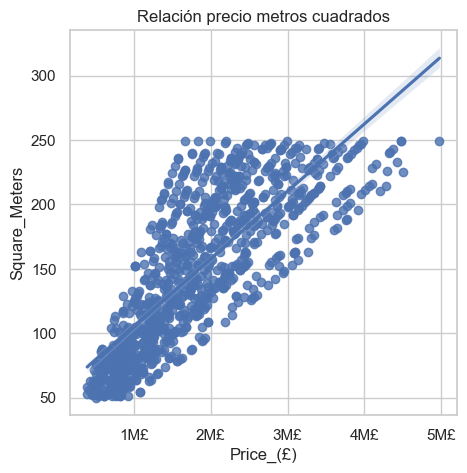

In [643]:
# Relación Square Meters-Price

plt.figure(figsize=(5,5))
sns.regplot(data=numericas, x ="Price_(£)",y="Square_Meters")

# Ajustar los parámetros de eje
plt.xticks(ticks=[1000000,2000000,3000000,4000000,5000000],labels=["1M£","2M£","3M£","4M£","5M£"])

plt.title("Relación precio metros cuadrados")
plt.show()

Puesto que la relación entre ambas variables es ascendente, podemos afirmar que cuanto más metros cuadrados tenga el piso, más alto es el precio. Parece lógica esta afirmación.

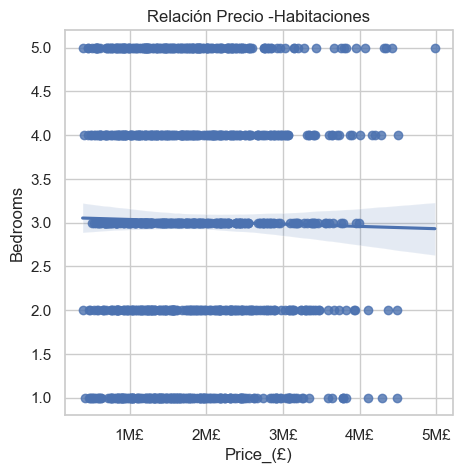

In [645]:
# Relación Bedrooms-Price
plt.figure(figsize=(5,5))
sns.regplot(data=numericas, x ="Price_(£)",y="Bedrooms")

plt.xticks(ticks=[1000000,2000000,3000000,4000000,5000000],labels=["1M£","2M£","3M£","4M£","5M£"])

plt.title("Relación Precio -Habitaciones")
plt.show()

La relación entre ambas variables resulta curiosa pues, aunque la linea de tendencia se mantiene bastante plana, existe una ligera pendiente negativa que nos dice que a cuanto menos habitaciones  en el inmueble mayor es el precio. No resulta lógica esta afirmación por lo que extraeremos conclusiones al final del estudio.

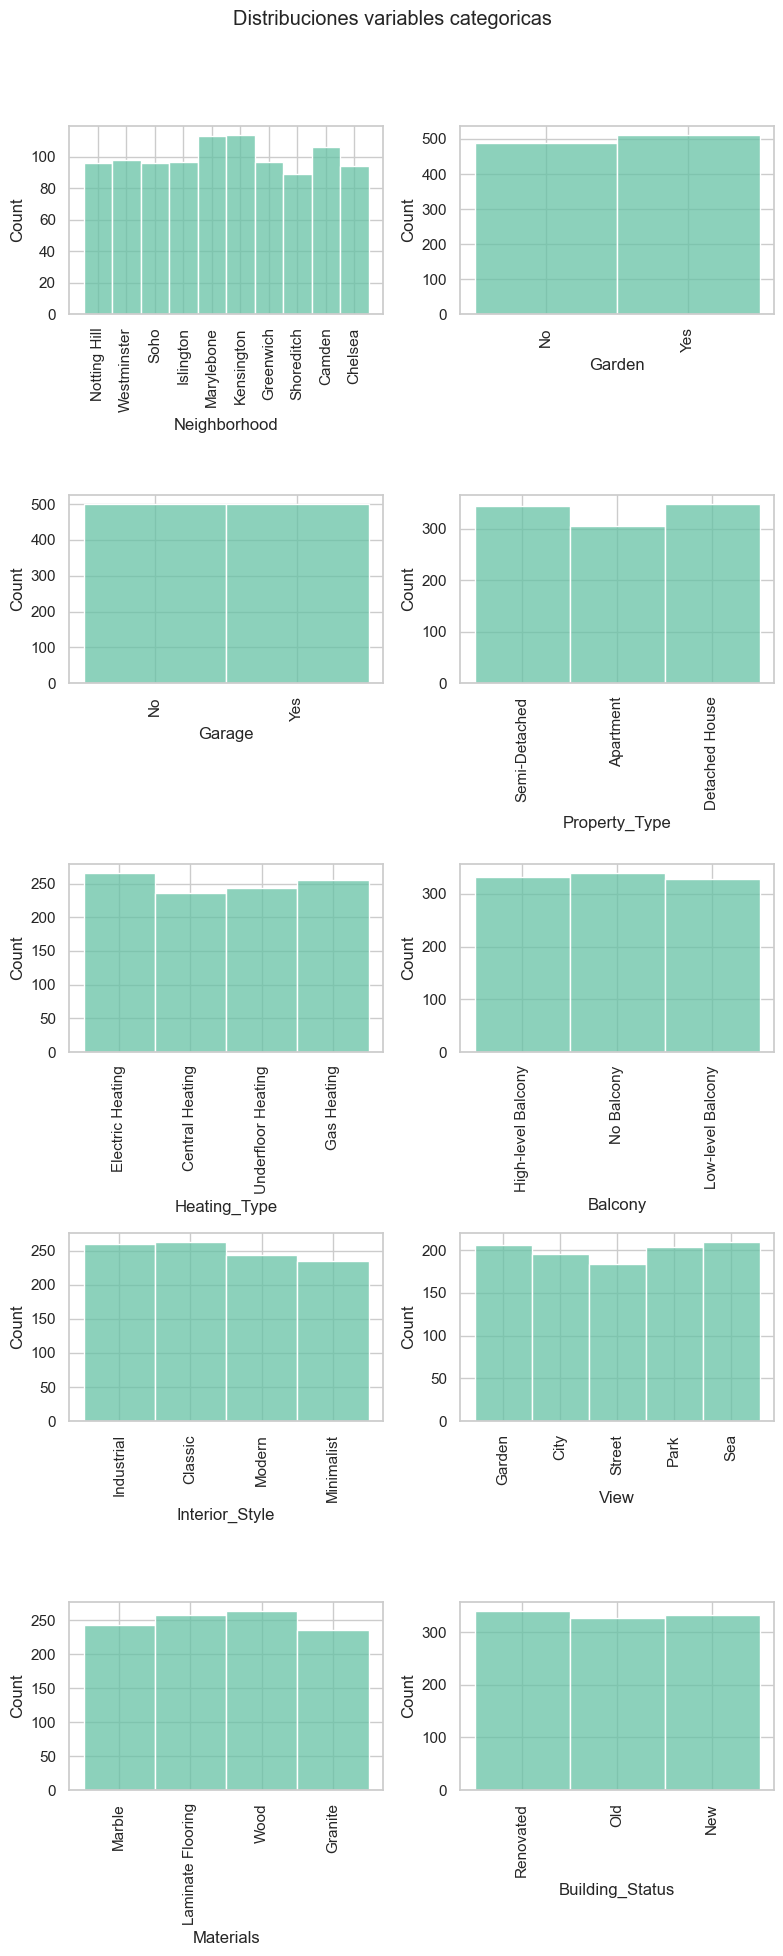

In [647]:
# Representación distribuciones variables categoricas
num_columns = 2
num_rows = 5
sns.set_theme(style="whitegrid",palette="Set2")

fig, axes = plt.subplots(num_rows,num_columns,figsize = (8,20))
axes = axes.flatten()

for i, column in enumerate(categoricas.columns):
    sns.histplot(categoricas[column],ax=axes[i])
    axes[i].tick_params(axis="x",rotation=90)

plt.subplots_adjust(hspace=4.5)
fig.suptitle("Distribuciones variables categoricas")
plt.tight_layout(rect=[0, 0.003, 1, 0.95])
plt.show()

Podemos concluir que no existen valores atípicos en las variables categóricas.

Vamos a representar el precio medio por barrio, pues consideramos que es la variable categorica más relevante.

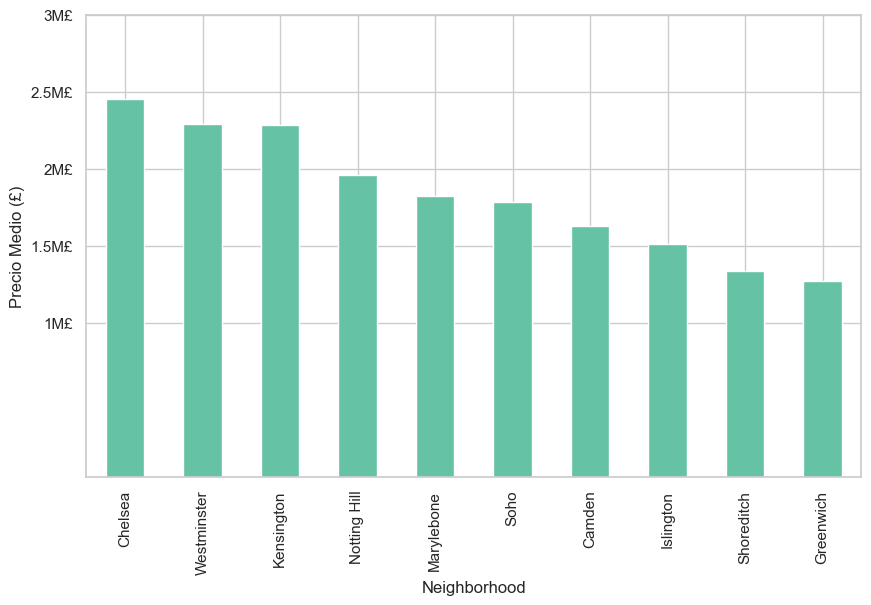

In [650]:
# Representación precio medio por barrio

barrio_precios = data.groupby("Neighborhood")["Price_(£)"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
barrio_precios.plot(kind="bar")
plt.ylabel("Precio Medio (£)")
plt.yticks(ticks=[1000000,1500000,2000000,2500000,3000000],labels=["1M£","1.5M£","2M£","2.5M£","3M£"])
plt.show()

Observamos que los barrios mas caros son Chelsea, Westminster y Kensington mientras que los más baratos son Greenwich Shoreditch y Islington, lo cual tiene sentido pues en los tres primeros es donde se concentran las renta más altas. 

<Axes: >

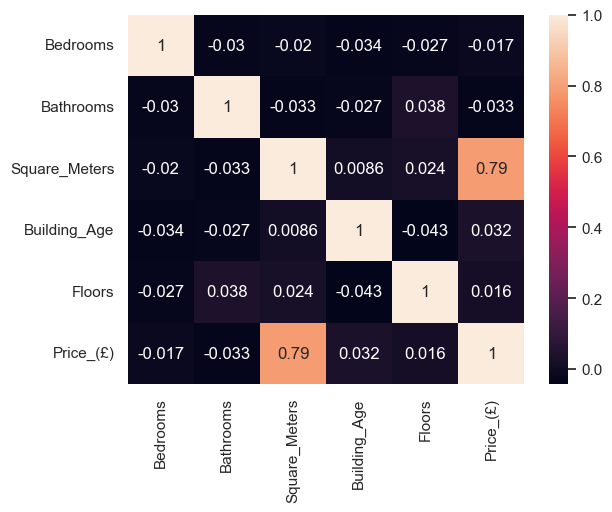

In [652]:
# Correlaciones de las variables numéricas

sns.heatmap(numericas.corr(),annot=True)

Podemos observar una alta correlación entre la variable Price y la variable Square Meters, conclusion que podíamos extraer mediante el grafico de relación lineal entre abmas variables. Bedrroms y Price tiene una relación negativa, conclusión que afirma la pendiente negativa anterior.

Vamos a realizar un gráfico que relacione la edad de los edificios con el precio y además determine el barrio donde se encuentra. 

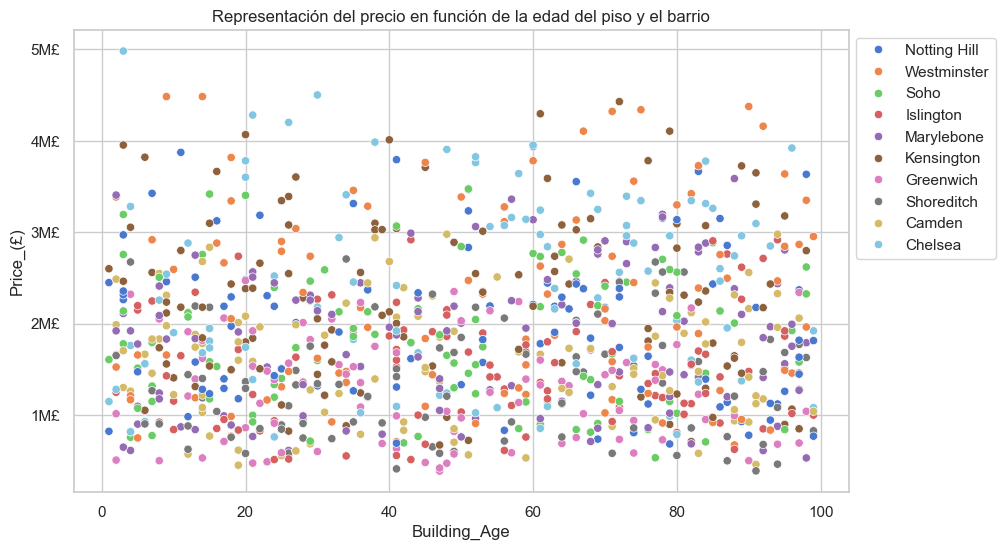

In [655]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Building_Age",y="Price_(£)",data=data,hue="Neighborhood",palette="muted")
plt.title("Representación del precio en función de la edad del piso y el barrio")
plt.legend(loc="upper left",bbox_to_anchor=(1,1))
plt.yticks(ticks=[1000000,2000000,3000000,4000000,5000000],labels=["1M£","2M£","3M£","4M£","5M£"])
plt.show()

Las conclusiones que podemos extraer es que podemos observar los pisos mas antiguos en Greenwich, mientras que los pisos mas nuevos en Chelsea y Westminster. Aunque hay una alta variedad.

#### Transformación variables categóricas

Para poder implemetnar nuestro Random Forest Regressor es necesario que trasnformemos las variables categóricas en numéricas. Empezaremos transformando las variables Garden y Garage que son de si o no, otorgando un 1 si es Yes y un 0 si es No. Otorgamos un número mas elevado al Yes para poder luego dar un estudio lógico a las correlaciones.

In [658]:
data["Garden"] = data["Garden"].map({"Yes":1,"No":0})
data["Garage"] = data["Garage"].map({"Yes":1,"No":0})
data.head()

,Neighborhood,Bedrooms,Bathrooms,Square_Meters,Building_Age,Garden,Garage,Floors,Property_Type,Heating_Type,Balcony,Interior_Style,View,Materials,Building_Status,Price_(£)
0,Notting Hill,2,3,179,72,0,0,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,Westminster,2,1,123,34,1,0,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,Soho,5,3,168,38,0,1,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,Islington,5,1,237,53,1,1,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,Marylebone,4,1,127,23,0,1,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


Vamos a considerar eliminar alguna variable, pues la existencia de tantas variables puede hacer que nuestro modelo no funcione correctamente. Para ello vamos a eliminar las variables que consideramos menos relevantes como Heating_Type, Interior_Style, View y Materials. 

In [660]:
data.drop(["Heating_Type","Interior_Style","View","Materials"],axis=1,inplace=True)
data.head()

,Neighborhood,Bedrooms,Bathrooms,Square_Meters,Building_Age,Garden,Garage,Floors,Property_Type,Balcony,Building_Status,Price_(£)
0,Notting Hill,2,3,179,72,0,0,3,Semi-Detached,High-level Balcony,Renovated,2291200
1,Westminster,2,1,123,34,1,0,1,Apartment,High-level Balcony,Old,1476000
2,Soho,5,3,168,38,0,1,3,Semi-Detached,No Balcony,Renovated,1881600
3,Islington,5,1,237,53,1,1,1,Apartment,No Balcony,Renovated,1896000
4,Marylebone,4,1,127,23,0,1,2,Semi-Detached,No Balcony,Old,1524000


Vamos a asignar un numero a cada uno de los barrios. Para ello vamos a seguir una relación lógica en función de su precio medio. Aquel que tenga el precio medio más elevado, más valor tendrá.

* Chelsea      =   9
* Westminster  =   8
* Kensington   =   7
* Notting Hill =   6
* Marylebone   =   5
* Soho         =   4
* Camden       =   3
* Islington    =   2
* Shoreditch   =   1
* Greenwich    =   0 

In [662]:
data["Neighborhood"] = data["Neighborhood"].map({"Chelsea":9,"Westminster":8,"Kensington":7,"Notting Hill":6,"Marylebone":5,"Soho":4,"Camden":3,"Islington":2,"Shoreditch":1,"Greenwich":0,})
data.head()

,Neighborhood,Bedrooms,Bathrooms,Square_Meters,Building_Age,Garden,Garage,Floors,Property_Type,Balcony,Building_Status,Price_(£)
0,6,2,3,179,72,0,0,3,Semi-Detached,High-level Balcony,Renovated,2291200
1,8,2,1,123,34,1,0,1,Apartment,High-level Balcony,Old,1476000
2,4,5,3,168,38,0,1,3,Semi-Detached,No Balcony,Renovated,1881600
3,2,5,1,237,53,1,1,1,Apartment,No Balcony,Renovated,1896000
4,5,4,1,127,23,0,1,2,Semi-Detached,No Balcony,Old,1524000


Ahora vamos a otorgar valores a la Property_Type. Suponemos que la Detached House es el mejor piso y el Apartment es el peor. Por lo tanto:

* Detached House = 2
* Semi-Detached House = 1
* Apartment = 0

In [664]:
data["Property_Type"]=data["Property_Type"].map({"Detached House":2,"Semi-Detached":1,"Apartment":0})
data.head()

,Neighborhood,Bedrooms,Bathrooms,Square_Meters,Building_Age,Garden,Garage,Floors,Property_Type,Balcony,Building_Status,Price_(£)
0,6,2,3,179,72,0,0,3,1,High-level Balcony,Renovated,2291200
1,8,2,1,123,34,1,0,1,0,High-level Balcony,Old,1476000
2,4,5,3,168,38,0,1,3,1,No Balcony,Renovated,1881600
3,2,5,1,237,53,1,1,1,0,No Balcony,Renovated,1896000
4,5,4,1,127,23,0,1,2,1,No Balcony,Old,1524000


La variable Balcony la vamos a definir en si tiene Balcón 1 y si no tiene balcón 0.

In [666]:
data["Balcony"] = data["Balcony"].map({"High-level Balcony":1,"Low-level Balcony":1,"No Balcony":0})
data.head()

,Neighborhood,Bedrooms,Bathrooms,Square_Meters,Building_Age,Garden,Garage,Floors,Property_Type,Balcony,Building_Status,Price_(£)
0,6,2,3,179,72,0,0,3,1,1,Renovated,2291200
1,8,2,1,123,34,1,0,1,0,1,Old,1476000
2,4,5,3,168,38,0,1,3,1,0,Renovated,1881600
3,2,5,1,237,53,1,1,1,0,0,Renovated,1896000
4,5,4,1,127,23,0,1,2,1,0,Old,1524000


La variable Bulding_Status vamos a enumerarla de la siguiente manera:

* New       = 2
* Renovated = 1
* Old       = 0

In [668]:
data["Building_Status"] = data["Building_Status"].map({"Renovated":1,"New":2,"Old":0})
data.head()

,Neighborhood,Bedrooms,Bathrooms,Square_Meters,Building_Age,Garden,Garage,Floors,Property_Type,Balcony,Building_Status,Price_(£)
0,6,2,3,179,72,0,0,3,1,1,1,2291200
1,8,2,1,123,34,1,0,1,0,1,0,1476000
2,4,5,3,168,38,0,1,3,1,0,1,1881600
3,2,5,1,237,53,1,1,1,0,0,1,1896000
4,5,4,1,127,23,0,1,2,1,0,0,1524000


Ya tenemos el DataFrame listo para aplicar el RandomForestRegressor peró, antes de todo, vamos a mapear las correlaciones.

<Axes: >

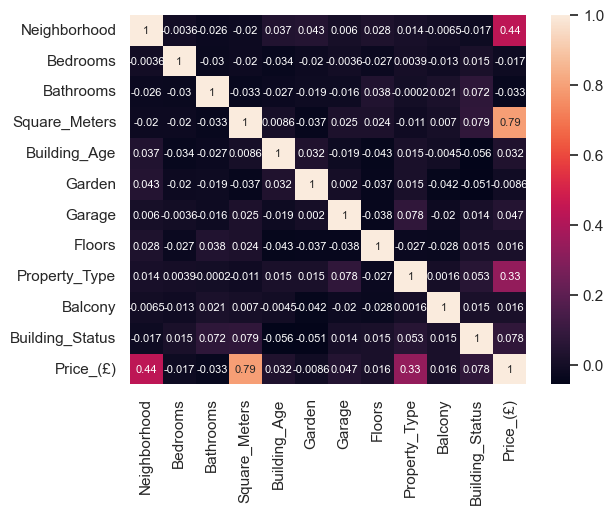

In [670]:
sns.heatmap(data.corr(),annot=True,annot_kws={"size": 8})

Podemos observar que las variables con una mayor correlación con el precio de los apartamentos són el Property_Type, el Square_Meters y el Neighborhood. Como aspectos interesantes, podemos observar las correlaciones negativas de Bedrroms, Bathrooms y Garden que, aunque son mínimas, indican que cuanto mayor sean estos números menor es el precio del inmueble.

#### Entrenamiento del modelo

Para ello debemos definir las variables X e y.

In [673]:
X = data.drop("Price_(£)",axis=1)
y = data["Price_(£)"]

In [674]:
(X_train,X_test,y_train,y_test) = train_test_split(X,y,test_size=0.2,random_state=123456789)

In [675]:
modelo = RandomForestRegressor(n_estimators=100)

In [676]:
modelo.fit(X_train,y_train)

RandomForestRegressor()

#### Evaluación del modelo

In [678]:
test_data_predicciones = modelo.predict(X_test)
test_data_predicciones

array([4356420.  , 1269802.55, 1330144.98, 2691578.45, 2239305.21,
       2929451.98, 2064503.88, 3330685.31, 1830127.78,  904819.61,
       1657245.69, 2298661.98, 2975999.65, 1266983.86, 3343950.  ,
       1773177.94, 2064555.88,  781141.05,  827282.3 , 1430538.  ,
       1883429.39, 1685306.24, 1559585.28,  852249.32, 1214747.75,
        855299.65, 2166265.99, 1530141.06, 1801166.17, 2088118.5 ,
       1498441.15, 3045635.96,  860438.48, 3401030.  ,  641624.27,
       2936151.64, 3221980.71, 2039597.96, 1418841.67,  869729.07,
       1796747.94, 2218565.99, 2247106.  , 2795493.17, 3217559.67,
       1229999.66, 4005320.  , 3360709.95, 2432651.87, 1143288.13,
       2931039.7 , 2562182.64,  930183.78, 2006104.86, 1121849.94,
       2582190.  ,  638132.88,  479779.77, 2214197.22, 2727097.99,
       1105979.75, 1082470.28, 1859155.77, 1729215.96,  637133.94,
       3155941.24, 1346916.98, 2847404.  , 1455833.89, 2442780.  ,
       1273648.95, 2182975.95, 1748105.1 , 2343697.29, 1535329

In [679]:
r2 = metrics.r2_score(y_test,test_data_predicciones)
r2

0.9908735141446664

Nuestro modelo explica un 99,08% de los precios de los inmuebles de Londres.

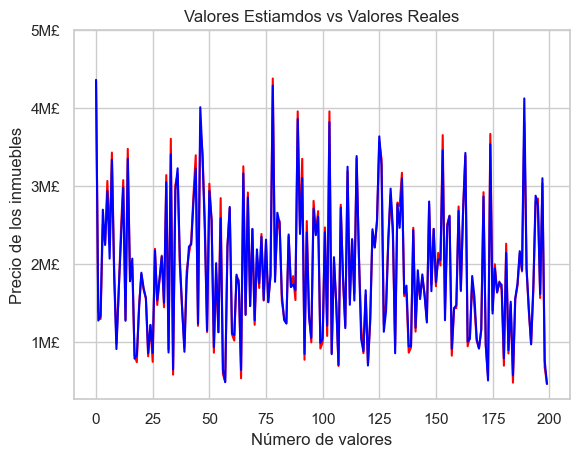

In [681]:
# Comparación valores estimados con valores reales

plt.plot(list(y_test),color="red",label="Valores Reales")
plt.plot(test_data_predicciones,color="blue",label="Valores estiamdos")
plt.title("Valores Estiamdos vs Valores Reales")
plt.xlabel("Número de valores")
plt.ylabel("Precio de los inmuebles")
plt.yticks(ticks=[1000000,2000000,3000000,4000000,5000000],labels=["1M£","2M£","3M£","4M£","5M£"])
plt.show()

Podemos observar que los valores estimados y los valores reales son muy parecidos, por lo tanto, concluimosque nuestro modelo de predicción es muy acertado.

#### Simulador del precio

Vamos a simular el precio para un inmuble que se encuentra en Chelsea(9), que tiene 4 habitaciones y 3 baños, de 200 metros cuadrados, construido en el año 92, con garaje y jardín, que se encuentra en un tercero, que se trata de una casa adosa com balcón y reformada. 

In [685]:
input_datos =(9,4,3,200,92,1,1,3,1,1,2)

# Cambiamos los datos de input a numpy array 
input_datos_as_numpy_array = np.asarray(input_datos)

# Debemos modificar la np array
input_datos_modificados = input_datos_as_numpy_array.reshape(1,-1)

prediccion = modelo.predict(input_datos_modificados)
prediccion

C:\Users\pauri\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([3045855.98])

El precio estimado por nuestro modelo es de 3.045.855,98£